## Image Filters (Introduction to CNNs)

Here are various filters (i.e. kernels) applied to an input image. Notice the change in outcome resulting from change in kernel values.

### The Input Image

Here's a picture I took in Nanjing during December 2019 (right before coronavirus struck!) -- we'll be using this as our input image. 

![Statue.jpg](Nanjing.jpeg)

Let's convert this image to grayscale and read it as a matrix so that we can perform some image manipulation.

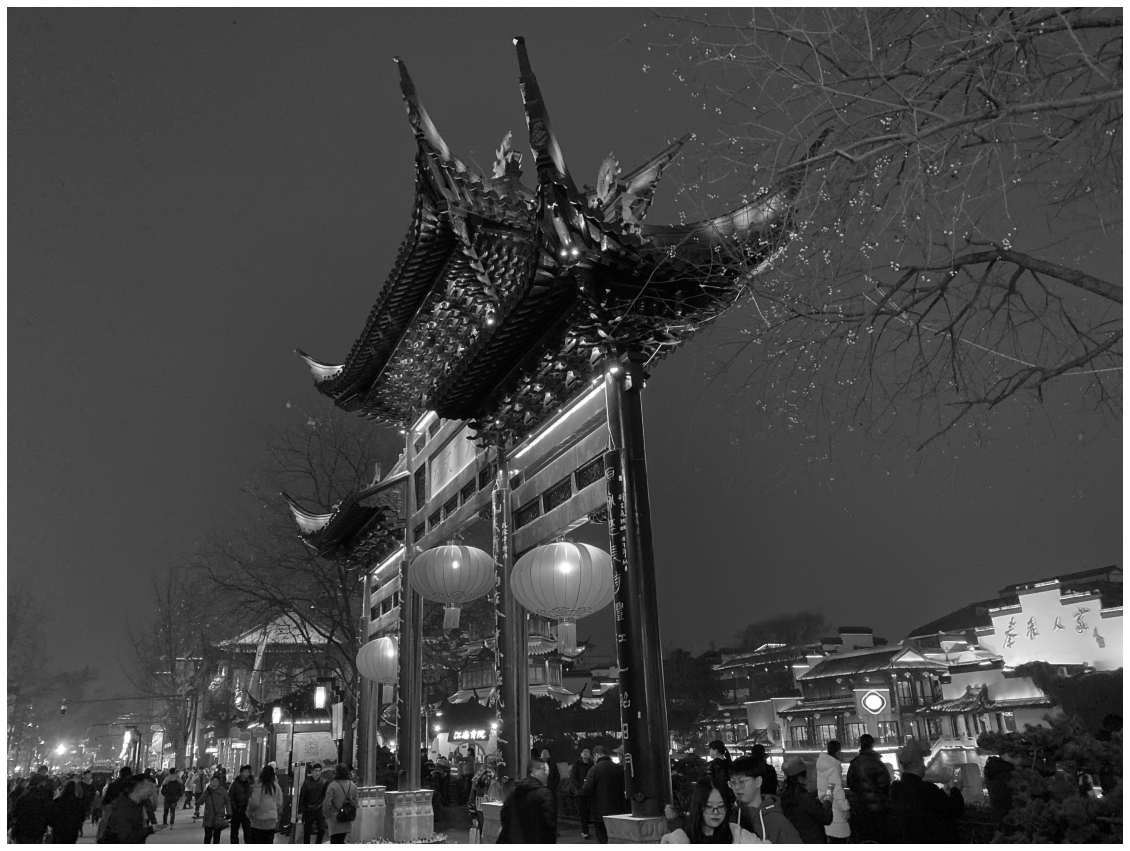

In [12]:
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from PIL import ImageOps

nanjing = cv2.imread("Nanjing.jpeg", 0) 
plt.figure(figsize = (20,20))
imgplot = plt.imshow(nanjing, origin='upper', cmap="gray")
plt.axis('off')
plt.savefig("Nanjing_Gray.jpeg", bbox_inches='tight', pad_inches=0)

### Naive Edge Detection

Here we can use mixture of filters for edge detection: 

$$
X = \begin{bmatrix}
    -1 & 0 & 1 \\
    -2 & 0 & 2 \\ 
    -1 & 0 & 1 
\end{bmatrix} 
$$


$$
Y = \begin{bmatrix}
    -1 & -2 & -1 \\
    0 & 0 & 0 \\ 
    1 & 2 & 1 
\end{bmatrix}
$$


The kernels defined above are actually called Sobel Operators -- let's see what happens when we apply them successively to our input image. Here, "application" simply means element-wise multiplication, followed by aggregation across the $3^2 = 9$ output values from the kernel at each pixel. We then sum and clip pixel magnitudes for the final result. 

In [13]:
X = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Y = X.T

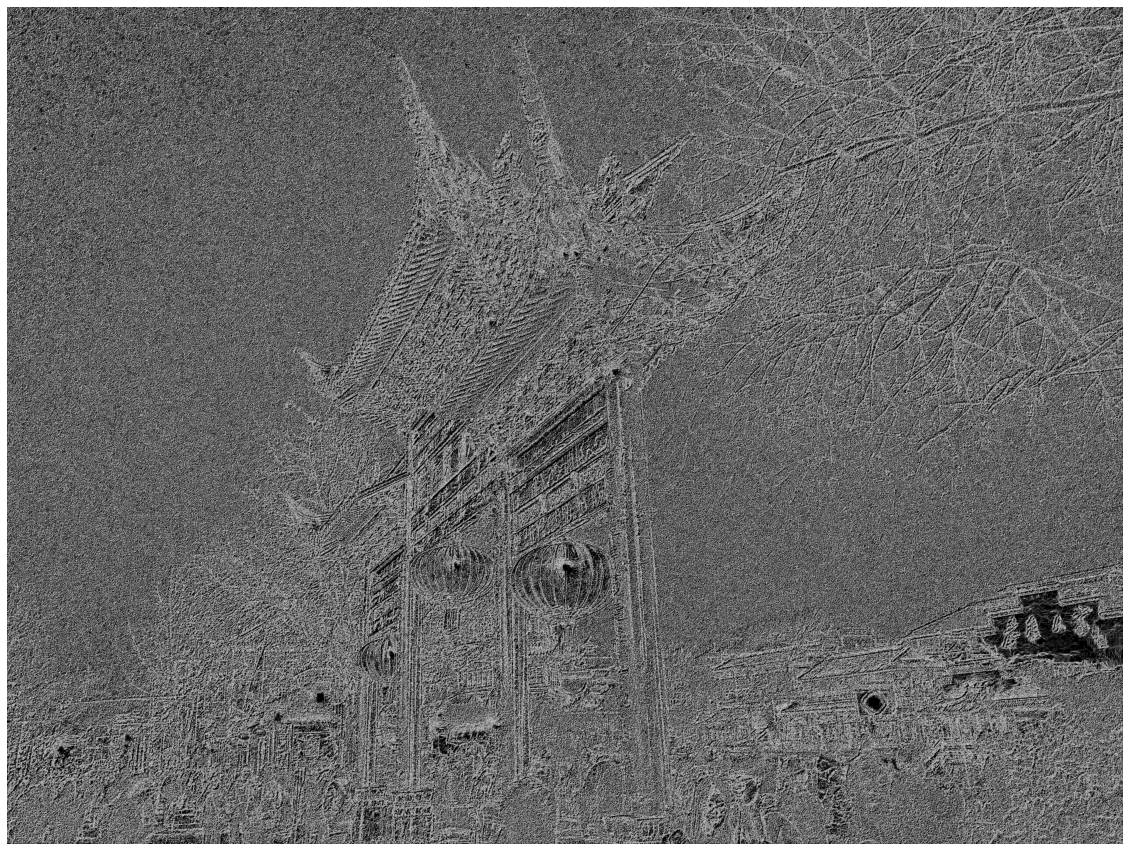

In [14]:
X_approx = cv2.filter2D(nanjing, -1, X)
Y_approx = cv2.filter2D(nanjing, -1, Y)

gradient_magnitude = np.sqrt(np.square(X_approx) + np.square(Y_approx))
gradient_magnitude *= 255.0 / gradient_magnitude.max()
gradient_magnitude = gradient_magnitude.astype('uint8')

plt.figure(figsize = (20,20))
imgplot = plt.imshow(gradient_magnitude, origin='upper', cmap="gray")
plt.axis('off')
plt.savefig("Nanjing_Edge.jpeg", bbox_inches='tight', pad_inches=0)

### Image Sharpening

We can use another simple kernel to create a subtle sharpening + brightening effect: 

$$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5.2 & -1 \\ 
0 & -1 & 0
\end{bmatrix} $$ 

Here's the output:

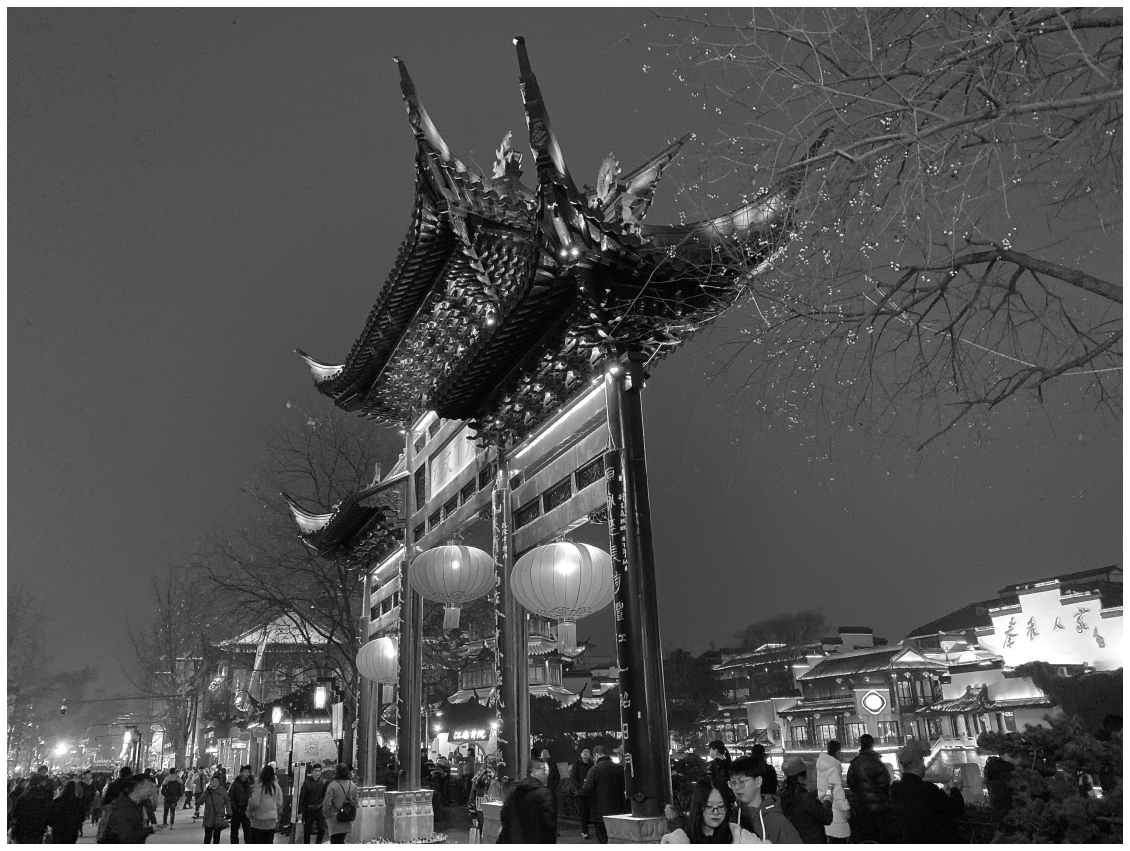

In [15]:
sharpen_kernel = np.array([[0, -1, 0], [-1, 5.2, -1], [0, -1, 0]])
sharpened = cv2.filter2D(nanjing, -1, sharpen_kernel)

plt.figure(figsize = (20,20))
plt.imshow(sharpened, origin='upper', cmap="gray");
plt.axis('off')
plt.savefig("Nanjing_Sharp.jpeg", bbox_inches='tight', pad_inches=0)

### Simple Uniform Blurring

Finally, we can also blur our images by applying the following kernel: 

$$
    \frac{1}{225} \space \begin{bmatrix}
    1 & 1 & \cdots & 1 \\
    1 & 1 & \cdots & 1 \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & 1 & \cdots & 1 
    \end{bmatrix}_{15 \times 15} $$

Here's the output:

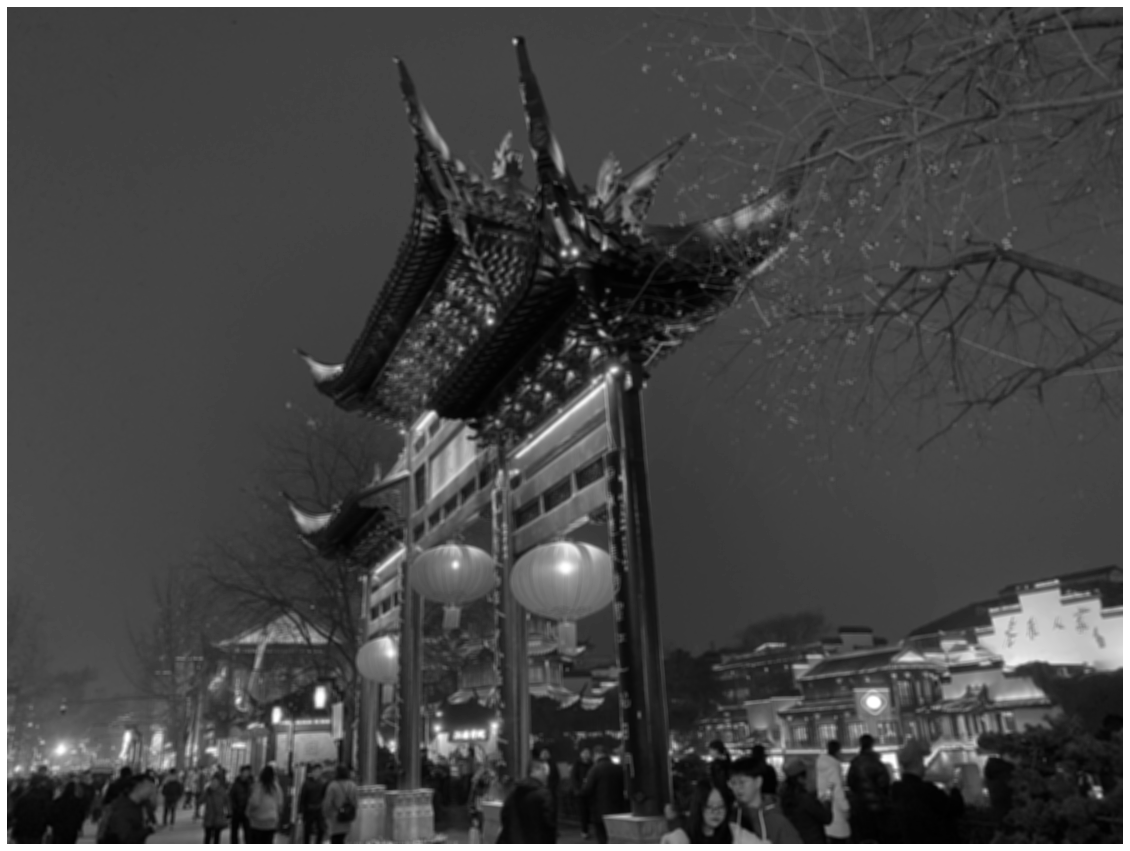

In [16]:
blur_kernel = np.full((15,15), 1/225)
blurred = cv2.filter2D(nanjing, -1, blur_kernel)

plt.figure(figsize = (20,20))
plt.imshow(blurred, origin='upper', cmap="gray");
plt.axis('off')
plt.savefig("Nanjing_Blur.jpeg", bbox_inches='tight', pad_inches=0)